# LINEAR REGRESSION VS POLYNOMIAL REGRESSION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('plant.csv')
df

,Pesticide_Amount_mg_per_ha,Plant_Production
0,0,10
1,50,15
2,100,18
3,150,20
4,200,21
5,250,20
6,300,18
7,350,15
8,400,10
9,450,4


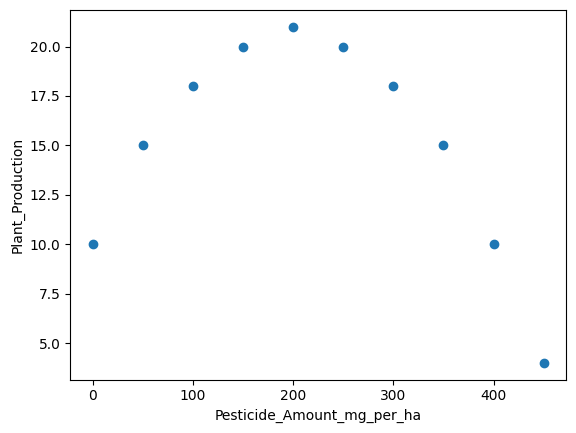

In [ ]:
plt.scatter(df['Pesticide_Amount_mg_per_ha'],df['Plant_Production'])
plt.xlabel('Pesticide_Amount_mg_per_ha')
plt.ylabel('Plant_Production')
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
function = PolynomialFeatures(degree=2)
pesticide = function.fit_transform(df[['Pesticide_Amount_mg_per_ha']])

In [ ]:
pesticide

array([[1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 5.000e+01, 2.500e+03],
       [1.000e+00, 1.000e+02, 1.000e+04],
       [1.000e+00, 1.500e+02, 2.250e+04],
       [1.000e+00, 2.000e+02, 4.000e+04],
       [1.000e+00, 2.500e+02, 6.250e+04],
       [1.000e+00, 3.000e+02, 9.000e+04],
       [1.000e+00, 3.500e+02, 1.225e+05],
       [1.000e+00, 4.000e+02, 1.600e+05],
       [1.000e+00, 4.500e+02, 2.025e+05]])

In [ ]:
model = LinearRegression();
model.fit(pesticide,df['Plant_Production'])

LinearRegression()

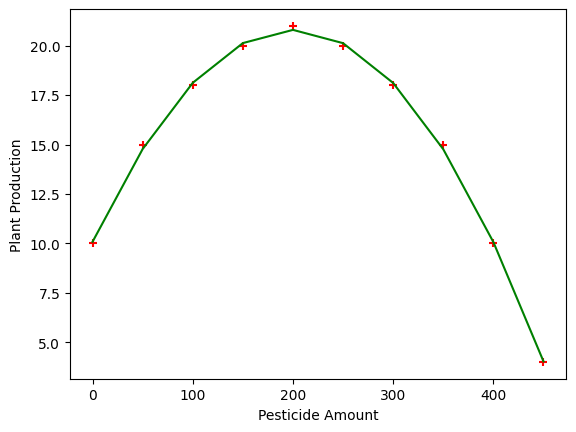

In [ ]:
plt.xlabel("Pesticide Amount")
plt.ylabel("Plant Production")
plt.scatter(df['Pesticide_Amount_mg_per_ha'], df['Plant_Production'], color='red', marker='+')
plt.plot(df['Pesticide_Amount_mg_per_ha'], model.predict(pesticide), color='green')

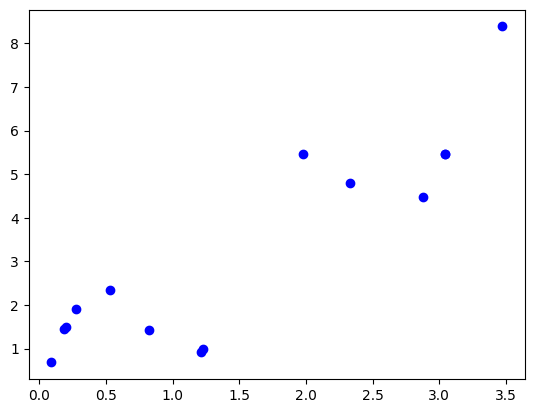

Poly Train Accuracy: 0.999999300516099


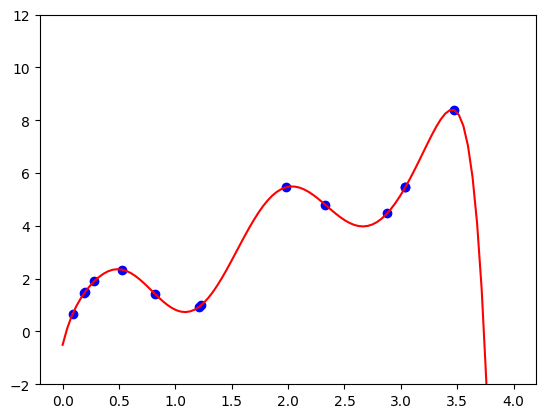

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# ==========================================
# 1. LOAD TRAINING DATA (Historical Campaigns)
# ==========================================
X = [[0.09], [0.19], [0.20], [0.28], [0.53], [0.82], [1.21],
           [1.23], [1.98], [2.33], [2.88], [3.04], [3.04], [3.47]]
y = [0.68, 1.44, 1.50, 1.90, 2.34, 1.42, 0.93,
           1.00, 5.46, 4.80, 4.48, 5.46, 5.47, 8.39]

# Visualise raw training data
plt.scatter(X, y, color='blue')
plt.show()

# ==========================================
# 2. TRAIN MODELS
# ==========================================

# --- Model A: Complex Polynomial (The Trap) ---
poly = PolynomialFeatures(degree=10)
X_poly = poly.fit_transform(X)

model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# --- Model B: Simple Linear (The Baseline) ---


# ==========================================
# 3. VISUALISE THE "PERFECT FIT"
# ==========================================
# We generate smooth points to see the "wiggle" between the training dots
X_plot = np.linspace(0, 4, 100).reshape(-1, 1)

plt.scatter(X, y, color='blue')
plt.plot(X_plot, model_poly.predict(poly.transform(X_plot)), color='red')
plt.ylim(-2, 12)
# Print Training Accuracy
print("Poly Train Accuracy:",  r2_score(y, model_poly.predict(X_poly)))

In [ ]:
X_test = [[0.71], [1.16], [1.54], [2.66], [3.45], [3.88]]
y_test = [1.86, 0.82, 2.87, 3.91, 8.33, 8.03]

print("\n--- TESTING RESULTS ---")
# Poly Test
X_test_poly = poly.transform(X_test)
print("Poly Test Accuracy:",  r2_score(y_test, model_poly.predict(X_test_poly)))


--- TESTING RESULTS ---
Poly Test Accuracy: -15.602379450887852


In [ ]:
# WHAT IF WE CHOOSE LINEAR MODEL OVER POLYNOMIAL ? --> OVERFITTING PROBLEM ( ACCURACY FAILS IF THE MODEL IS TOO COMPLEX)
model_linear = LinearRegression()
model_linear.fit(X, y)

LinearRegression()

In [ ]:
# OVERFITTING :
# When you make your model too complex , it fails to capture the general patterns in the data it gives good training accuracy but fails in testing!

# LOGISTIC REGRESSION

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('student_exam_simple.csv')
df

,Hours_Studied,Passed_Exam
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [ ]:
model = LogisticRegression()
model.fit(df[['Hours_Studied']],df['Passed_Exam'])

LogisticRegression()

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


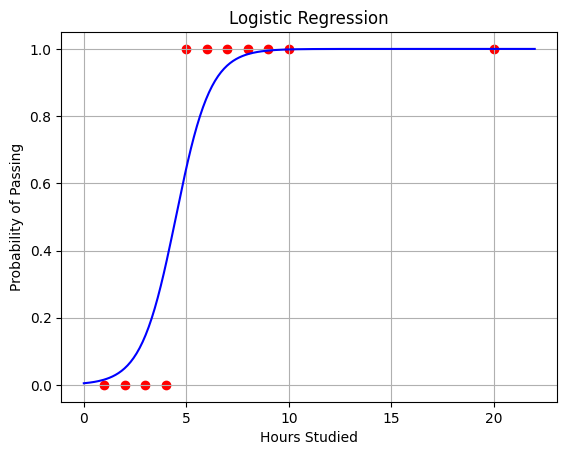

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_plot = np.linspace(0, 22, 300).reshape(-1,1)
y_pred = model.predict_proba(X_plot)[:, 1]

plt.scatter(df['Hours_Studied'], df['Passed_Exam'], color='red')
plt.plot(X_plot, y_pred, color='blue')

plt.title('Logistic Regression')
plt.xlabel('Hours Studied')
plt.ylabel('Probability of Passing')
plt.grid(True)

In [ ]:
# THRESHOLD is applied to convert the continuous output to 1 or 0
model.predict([[4]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
# PROBABILITY OF THE DATA --> WE CAN DO THIS PRACTICE ON KAGGLE!
model.predict_proba([[10]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.00149572, 0.99850428]])

# ACTIVITY - LAB

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder , OneHotEncoder ,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# STEPS :
# CHECK NULL VALUES
# FILL WITH MEDIAN
# REMOVE OUTLIERS
# SCALE THE DATA
# SPLIT THE DATA
# ENCODE THE REQUIRED DATA iF REQUIRED
# LOGISTIC REGRESSION
# PLOT THE DATA

In [ ]:
df = pd.read_csv('cadet_recruitment_full.csv')


In [ ]:
df.isnull().sum()

,0
Cadet_ID,0
Physical_Score,25
Intelligence_Score,0
Academy_Age,0
Gender,0
Prev_Experience,0
Recruited,0


In [ ]:
df['Physical_Score'] = df['Physical_Score'].fillna(df['Physical_Score'].median())


In [ ]:
# REMOVED OUTLIERS
numerical_cols = ['Physical_Score','Intelligence_Score','Academy_Age']
Q1 = df['Physical_Score'].quantile(0.25)
Q3 = df['Physical_Score'].quantile(0.75)

IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df_clean = df[(df['Physical_Score'] >= lower_limit) & (df['Physical_Score'] <= upper_limit)]
df = df_clean

In [ ]:
df = pd.get_dummies(df , columns = ['Gender'])

In [ ]:
scaler = MinMaxScaler()
df[['Physical_Score', 'Intelligence_Score']] = scaler.fit_transform(df[['Physical_Score', 'Intelligence_Score']])
df.head()

,Cadet_ID,Physical_Score,Intelligence_Score,Academy_Age,Prev_Experience,Recruited,Gender_F,Gender_M,Gender_NB
1,2,0.454057,0.864341,5,0,1,True,False,False
2,3,0.618994,0.243620,2,1,1,False,True,False
3,4,0.802690,0.611689,5,1,1,False,True,False
4,5,0.433934,0.383963,4,1,1,True,False,False
5,6,0.487481,0.414646,2,0,0,False,False,True


In [ ]:
X = df[['Physical_Score', 'Intelligence_Score', 'Gender_F', 'Gender_M', 'Gender_NB']]
y = df['Recruited']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
accuracy = accuracy_score(y_test, predictions)
print(accuracy)


0.6868686868686869
